In [ ]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
  inflating: spam.csv                


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/spam.csv",encoding = 'Latin-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.columns = ['label','text']

In [ ]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='label'>

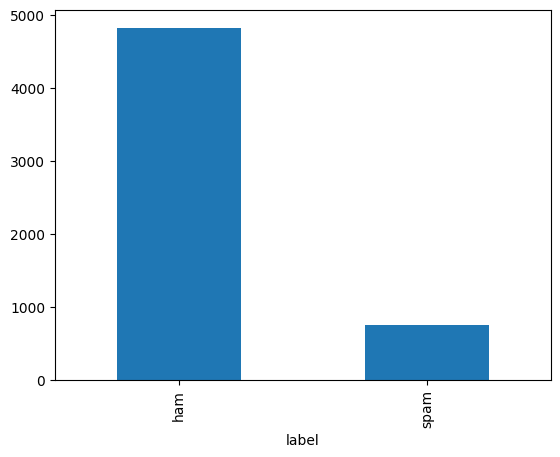

In [ ]:
data['label'].value_counts().plot(kind='bar')

<Axes: xlabel='label'>

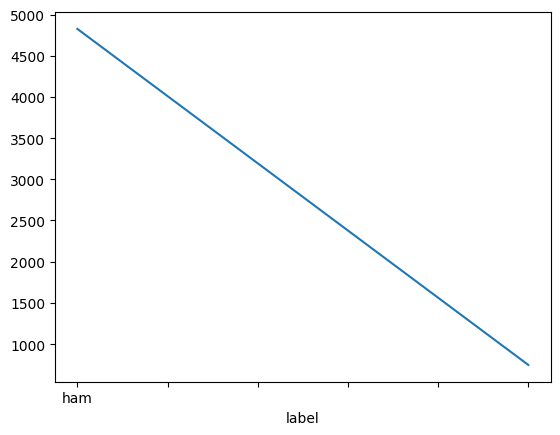

In [ ]:
data['label'].value_counts().plot(kind='line')

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def data_prep(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = word_tokenize(text)
  lemmatizer = nltk.WordNetLemmatizer() # Changed variable name to 'lemmatizer'
  text = [lemmatizer.lemmatize(word) for word in text] # Call the method on the object
  text = [word for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [ ]:
data_1 = data['text'].apply(data_prep)

In [ ]:
data_1[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply'

In [ ]:
vect = TfidfVectorizer()
x = vect.fit_transform(data['text'])

In [ ]:
y = data['label']

In [ ]:
x.shape

(5572, 8672)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode all of y first

# Split the encoded data
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=123)
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train_encoded)
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
sm = SMOTE(random_state=2)
x_tres, y_res = sm.fit_resample(x, y)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("accuracy score",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [ ]:
model_eval(y_train_encoded,y_hat_train_dtree)

accuracy score 1.0
[[3843    0]
 [   0  614]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3843
           1       1.00      1.00      1.00       614

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [ ]:
model_eval(y_test_encoded,y_hat_test_dtree)

accuracy score 0.97
[[967  15]
 [ 17 116]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       982
           1       0.89      0.87      0.88       133

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier , GradientBoostingClassifier

In [ ]:
rf=RandomForestClassifier(max_depth=3)
rf.fit(x_train,y_train_encoded)
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train_encoded, y_hat_train_rf)

accuracy score 0.86
[[3843    0]
 [ 614    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3843
           1       0.00      0.00      0.00       614

    accuracy                           0.86      4457
   macro avg       0.43      0.50      0.46      4457
weighted avg       0.74      0.86      0.80      4457



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_eval(y_test_encoded, y_hat_test_rf)

accuracy score 0.88
[[982   0]
 [133   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       982
           1       0.00      0.00      0.00       133

    accuracy                           0.88      1115
   macro avg       0.44      0.50      0.47      1115
weighted avg       0.78      0.88      0.82      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train_encoded)

GradientBoostingClassifier()

In [ ]:
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train_encoded, y_hat_train_gb)

accuracy score 0.98
[[3836    7]
 [  66  548]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3843
           1       0.99      0.89      0.94       614

    accuracy                           0.98      4457
   macro avg       0.99      0.95      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [ ]:
model_eval(y_test_encoded, y_hat_test_gb)

accuracy score 0.97
[[977   5]
 [ 28 105]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       982
           1       0.95      0.79      0.86       133

    accuracy                           0.97      1115
   macro avg       0.96      0.89      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train_encoded)

MultinomialNB()

In [ ]:
y_hat_train_nb = nb.predict(x_train)
y_hat_test_nb = nb.predict(x_test)

In [ ]:
model_eval(y_train_encoded,y_hat_train_nb)

accuracy score 0.97
[[3843    0]
 [ 136  478]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3843
           1       1.00      0.78      0.88       614

    accuracy                           0.97      4457
   macro avg       0.98      0.89      0.93      4457
weighted avg       0.97      0.97      0.97      4457



In [ ]:
model_eval(y_test_encoded,y_hat_test_nb)

accuracy score 0.97
[[982   0]
 [ 38  95]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       1.00      0.71      0.83       133

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.96      1115



creating an app

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
# prompt: create an app

import gradio as gr

def predict_spam(text):
  text_prep = data_prep(text)
  text_vect = vect.transform([text_prep])
  prediction = nb.predict(text_vect)
  if prediction == 0:
    return "This message is not spam"
  else:
    return "This message is spam"

# Create the Gradio interface
demo = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(lines=5, label="Enter your message here"),
    outputs="text"
)

demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://aa19cb2e4512a8d711.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#tokenizer text

In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['text'].values)
sequences = tokenizer.texts_to_sequences(data['text'])

In [ ]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'will': 33,
 'if': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'home': 77,
 "i'll": 78,
 'need': 79,
 'about': 80,
 'r': 81,
 'lor': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [ ]:
len(tokenizer.word_index)

8920

In [ ]:
sequences

[[50,
  469,
  4410,
  841,
  751,
  657,
  64,
  8,
  1324,
  89,
  121,
  349,
  1325,
  147,
  2987,
  1326,
  67,
  58,
  4411,
  144],
 [46, 336, 1495, 470, 6, 1929],
 [47,
  486,
  8,
  19,
  4,
  796,
  899,
  2,
  178,
  1930,
  1199,
  658,
  1931,
  2320,
  267,
  2321,
  71,
  1930,
  2,
  1932,
  2,
  337,
  486,
  554,
  955,
  73,
  388,
  179,
  659,
  389,
  2988],
 [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152],
 [1018, 1, 98, 107, 69, 487, 2, 956, 69, 1933, 218, 111, 471],
 [797,
  127,
  67,
  1683,
  145,
  108,
  160,
  1934,
  21,
  7,
  38,
  338,
  87,
  900,
  55,
  115,
  411,
  3,
  44,
  12,
  14,
  85,
  1935,
  46,
  380,
  955,
  4412,
  2,
  68,
  322,
  230,
  2,
  2990],
 [211, 11, 632, 9, 25, 55, 2, 381, 36, 10, 109, 718, 10, 55, 4413, 4414],
 [72,
  234,
  13,
  1200,
  2322,
  2323,
  1936,
  2324,
  2325,
  2326,
  798,
  119,
  108,
  608,
  72,
  13,
  1019,
  12,
  51,
  1684,
  842,
  412,
  2,
  1099,
  13,
  246,
  1019],
 [719,
  72,
  4

In [ ]:
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

In [ ]:
X.shape

(5572, 100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 100)
(1115, 100)
(4457,)
(1115,)


In [ ]:
!pip install tensorflow
import tensorflow as tf

y_train=[1 if labels=='spam' else 0 for labels in y_train]
y_test=[1 if labels=='spam' else 0 for labels in y_test]
y_train=tf.keras.utils.to_categorical(y_train) # Use the fully qualified name
y_test=tf.keras.utils.to_categorical(y_test)   # Use the fully qualified name

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words,output_dim=100,input_length=100))
model.add(SimpleRNN(units=64))
model.add(Dense(units=2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist= model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8839 - loss: 0.3007 - val_accuracy: 0.9848 - val_loss: 0.0571
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.9845 - loss: 0.0542 - val_accuracy: 0.9865 - val_loss: 0.0490
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.9953 - loss: 0.0209 - val_accuracy: 0.9874 - val_loss: 0.0415
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9987 - loss: 0.0076 - val_accuracy: 0.9857 - val_loss: 0.0473
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9991 - loss: 0.0060 - val_accuracy: 0.9874 - val_loss: 0.0457
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9892 - val_loss: 0.0457
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 0.9892 - val_loss: 0.0501
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.9996 - loss: 0.0013 

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: {}'.format(accuracy))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9834 - loss: 0.1661
Accuracy: 0.9838564991950989


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

classification_rep = classification_report(y_test_classes, y_pred_classes)
print("\nClassification Report:\n", classification_rep)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Confusion Matrix:
 [[981   1]
 [ 17 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       0.99      0.87      0.93       133

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

